# Mašinsko učenje - Klasterovanje

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Zadatak 1

Iz učitanog skupa podataka izdvojiti grupe sličnih podataka.

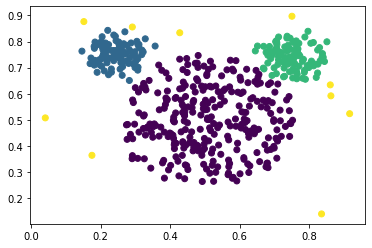

In [2]:
def ucitaj(putanja):
    with open(putanja) as fp:
        data = list(map(lambda l: list(map(lambda r: float(r), l.split(","))), fp.readlines()))
        data = np.array(data)
        return data

podaci = ucitaj("datasets/mouse.csv")
plt.scatter(podaci[:,0], podaci[:,1], c=podaci[:,2])

# Rešenje
1. Napisati funkciju za računanje udaljenosti, u ovom slučaju može se koristiti euklidska udaljenost.
2. Napisati algoritam k-means

## k-means algoritam
Ulaz u algoritam su podaci, broj klastera, maksimalan broj koraka i tolerancija.
1. Odabrati nasumično k centara
2. Za svaku tačku iz skupa podataka izračunati njenu udaljenost od svakog od centara
3. Svaku tačku pridružiti najbližem centru
4. Za svaki centar izračunati novu koordinatu kao srednju vrednost koordinata tačaka pridruženih posmatranom centru
5. Ukoliko nije dostignut maksimalni broj koraka i pomeranje centara nije manje od zadate tolerancije ponoviti algoritam od koraka 2
6. Vratiti rezultat, odnosno koordinate centara i sve tačke pridružene centrima

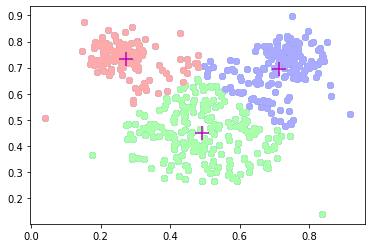

In [3]:
def dist(a, b):
    return np.sum((a-b)**2)

def kmeans(podaci, k=2, maksimalno_koraka=1000, tolerancija=0.000001):
    centri = np.random.rand(k, len(podaci[0]))
    izmenjeno = True
    korak = 0
    while korak < maksimalno_koraka and izmenjeno:
        grupe = [list() for i in range(k)]
        for p in podaci:
            arg_min = 0
            mins = []
            for c in centri:
                mins.append(dist(c, p))
            arg_min = np.argmin(mins)
            grupe[arg_min].append(p)
        
        novi_centri = np.zeros(centri.shape)
        for i, g in enumerate(grupe):
            novi_centri[i] = np.average(np.array(g), 0)
        izmenjeno = np.any(np.sum((centri - novi_centri)**2, 1)>tolerancija)
        centri = novi_centri
        korak += 1
    return centri, grupe
    
centri, grupe = kmeans(podaci[:,:2], k=3)

plt.scatter(podaci[:,0], podaci[:,1])

plt.scatter(np.array(grupe[0])[:,0], np.array(grupe[0])[:,1], c="#aaffaa")
plt.scatter(np.array(grupe[1])[:,0], np.array(grupe[1])[:,1], c="#aaaaff")
plt.scatter(np.array(grupe[2])[:,0], np.array(grupe[2])[:,1], c="#ffaaaa")

plt.scatter(centri[:,0], centri[:,1], c="m", marker='+', s=200)